<a href="https://colab.research.google.com/github/clumsycoder42525/car_price_predictior/blob/main/Car_Price_Predictor_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown


In [ ]:
!pip install gdown

import gdown

file_id = "1wIMfxcRXcRni6KooRKehvpmhC8qo_9KG"
url = f"https://drive.google.com/uc?id={file_id}"

output = "my_dataset.csv"
gdown.download(url, output, quiet=False)

import pandas as pd
df = pd.read_csv("my_dataset.csv")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1wIMfxcRXcRni6KooRKehvpmhC8qo_9KG
To: /content/my_dataset.csv
100%|██████████| 355k/355k [00:00<00:00, 71.4MB/s]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df["fuel"].unique(),df["seller_type"].unique(),df["owner"].unique(),df["transmission"].unique()

(array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [ ]:
le_name = LabelEncoder()
df['name'] = le_name.fit_transform(df['name'])

X = df.drop('selling_price', axis=1)
y = df['selling_price']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

column_trans = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [ ]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr=SVR()

In [ ]:
voting = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('svr', svr)
    ]
)


In [ ]:
model=Pipeline(
    [
        ('column_trans',column_trans),
        ('voting',voting)
    ]
)

In [ ]:
param_dist = {
    'voting__dt__max_depth': [3, 5, 10, 20, None],
    'voting__dt__min_samples_split': [2, 5, 10],
    'voting__svr__C': [0.1, 1, 10, 100],
    'voting__svr__gamma': ['scale', 'auto']
}

In [ ]:

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,
    cv=5,
    random_state=42,
    n_jobs=-1
)

X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)

y_pred = random_search.predict(X_test)

print("Best Params:", random_search.best_params_)
print("Best Score (neg-MSE):", random_search.best_score_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Best Params: {'voting__svr__gamma': 'auto', 'voting__svr__C': 0.1, 'voting__dt__min_samples_split': 2, 'voting__dt__max_depth': 20}
Best Score (neg-MSE): 0.5429432643376043
R² Score: 0.42941231472106534
MSE: 174126407152.89612


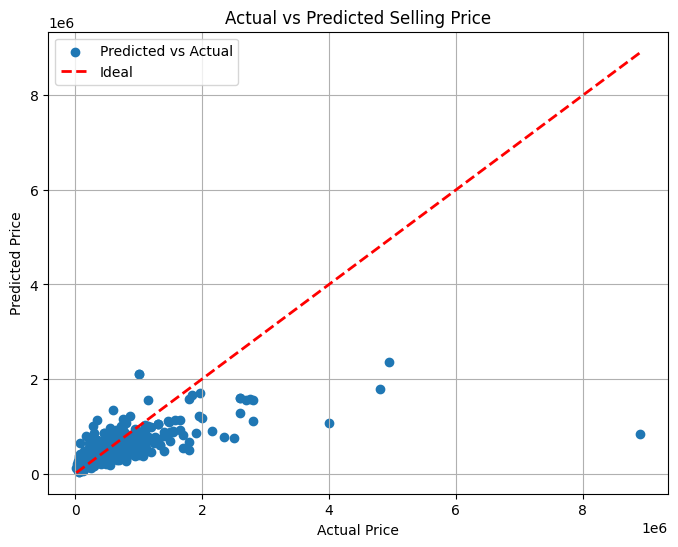

In [ ]:
import matplotlib.pyplot as plt

# y_test and y_pred honi chahiye already
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()
